In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

0. The Client Brief<br>
"Hi, this is Nisha, I work at the Albuquerque Environmental Health Department. We are on a mission to improve the air quality in our city. Our current mission: get polluting cars off the road and repaired before they are coming in for their regular emissions check. Can you help us?"

1. Background Research

* What is current air quality like in Albuqurque compared to the US?

In [14]:
data = {"County_Name": ["Erie, PA", "Bernalillo, NM", "Fresno, CA"],
       "Grade_Ozone": ["B", "F", "F"],
       "Grade_Particle_Pollution": ["A", "A", "F"]}
df = pd.DataFrame(data, index=["Best County", "Bernalillo, NM", "Worse County"])
print("Comparison of Bernalillo County's air quality grade (A = no air quality exceedences)\
to best and worse US air quality counties (2016 - 2018)")
df
# resources:
# State of the Air 2020, American Lung Association
# Environmental Protection Agency, https://www.epa.gov
# A = no days of air quality index exceedences of 100
# F = 9 or more days of above 100 air quality index

Comparison of Bernalillo County's air quality grade (A = no air quality exceedences)to best and worse US air quality counties (2016 - 2018)


,County_Name,Grade_Ozone,Grade_Particle_Pollution
Best County,"Erie, PA",B,A
"Bernalillo, NM","Bernalillo, NM",F,A
Worse County,"Fresno, CA",F,F


* How has air quality changed over time?

In [7]:
#Change in Ozone levels (Parts per million)
level_ozone_2000 = 0.075
level_ozone_2015 = 0.066
change_ozone = round(level_ozone_2015 - level_ozone_2000, 4)

#Change in Carbon Monoxide levels (Parts per million)
level_CO_2000 = 3.8
level_CO_2015 = 1.4
change_CO = round(level_CO_2015 - level_CO_2000, 4)

#Change in Nitrogen Dioxide levels (Parts per billion)
level_NO_2000 = 65
level_NO_2015 = 45
change_NO = level_NO_2015 - level_NO_2000
#convert to ppm
change_NO = change_NO/1000

#Percent change Ozone
percent_ozone = round(change_ozone/level_ozone_2000 * 100, 4)
percent_CO = round(change_CO/level_CO_2000 * 100, 4)
precent_NO = round(change_NO/level_NO_2000 * 100, 4)

data = {"Change ppm": [change_ozone, change_CO, change_NO], "Percent Change": [percent_ozone, percent_CO, precent_NO]}
df_change = pd.DataFrame(data = data, index = ["Ozone", "Carbon Monoxide", "Nitrogen Dioxide"])
print("Change in three air pollutants from 2000 to 2015 in Albuquerque")
df_change
#resources
# City of Albuquerque, https://www.cabq.gov/airquality/trends 

Change in three air pollutants from 2000 to 2015 in Albuquerque


,Change ppm,Percent Change
Ozone,-0.009,-12.0000
Carbon Monoxide,-2.400,-63.1579
Nitrogen Dioxide,-0.020,-0.0308


In [4]:
sns.set_theme()

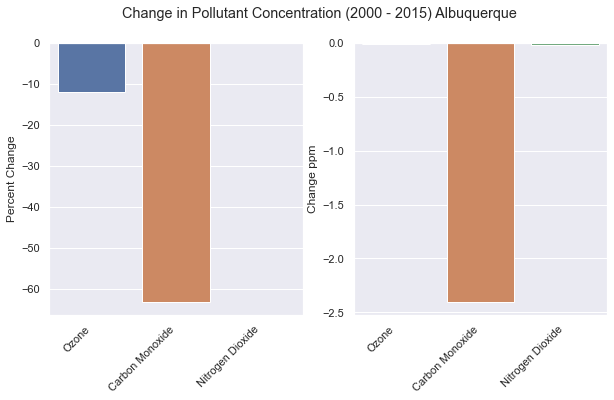

In [9]:
figure, axes = plt.subplots(1, 2, sharex=False, figsize=(10, 5))
figure.suptitle("Change in Pollutant Concentration (2000 - 2015) Albuquerque")
plot1 = sns.barplot(ax = axes[0], data=df_change, x = df_change.index, y = "Percent Change")
plot2 = sns.barplot(ax = axes[1], data=df_change, x = df_change.index, y = "Change ppm")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45, horizontalalignment='right')
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')
None

In [ ]:
# add seasonality plot

* What is the emissions test process?

1. All vehicles 35 year old or newer under 10,001 lbs (GVWR) including government, public utility and private fleets must pass an emissions inspection to be registered in Bernalillo County, and must be tested every two years.
2. Test Components:
* Pollution control equipment - converter and connections.
* Visible smoke - For burning oil or poor fuel combustion resulting in toxic particulate emissions.
* Gas cap(s)- For fuel vapor leaks.
* 1996 and Newer Vehicles: include On-Board Diagnostic (OBDII) for testing.
* 1995 and Older Vehicles (Up to 35 years old):receive a Tailpipe exhaust analysis for excessive carbon monoxide and hydrocarbon levels.

<br>resources:
Air Care Facts, City of Albuquerque (pamphlet)

* How is emissions test data collected?

* Part of the car data is entered by certified mechanics via a touch screen connected to the testing software and hardware
* Part of the emissions data is automatically read from the testing sensor
* OBD data is automatically read from the vehicle's software
* The procedure takes about 20 minutes

2. Client Meeting
* We could use car feature data to predict which cars will fail their emissions test
* The City of Albuquerque could use this data for examply to invite owners of vehicles that are likely to fail to come in for more frequent testing 

3. Cleaning, Exploring and Feature Engineering

* After several cycles of cleaning and exploring we created a package for loading and cleaning our data
* Rows where result is not either Pass or Fail are dropped
* Drops missing and strange car weight values
* Drops re-test records
* Drops strange ODOMETER values
* Creates a 'mile per year' feature
* Creates an 'engine-weight ratio' feature
* Creates a 'vehicle age' feature which is MODEL_YEAR + 2
* Creates an 'after covid' feature

In [10]:
from emissions.data import load_data, clean_data, split
df_full = load_data()
df_clean = clean_data(df_full)

----------------start loading data----------------
Data loaded: 187503 records
----------------start cleaning data----------------

Records in input data: 187503

Share of Pass and Fail before cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10813
Unique vehicles in Pass: 84908

Records with missing GVWR: 8125

Records after droping rows where GVWR is < 1000 or missing: 179373

Records after keeping only the earliest test within a month for each vehicle: 165732

Records where AFTER_COVID is True: 21325

Records where ODOMETER = 0: 796

Records after droping rows where ODOMETER is missing: 164855

Records after droping rows where MILE_YEAR > 40,000: 163891

Records in output data:163891

Share of Pass and Fail after cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10194
Unique vehicles in Pass: 78573
['VEHICLE_TYPE' 'MODEL_YEAR' 'VEHICLE_AGE' 'MILE_YEAR' 'GVWR'
 'ENGINE_SIZE' 'TRANS_TYPE' 'TEST_TYPE' 'RESULT' 'MAKE'
 'ENGINE_WEIGHT_RATIO' 'SPORT' 'TEST_SDATE' 'AFTER_COVID']


Baseline Model:
- Heuristic
- Decision Tree with two features

Expanding the model:
- Random Forest
- Ordered testing
- Optimizing for maximal area of curve

Implementing ordered testing with client:
- What needs to change
- What will change

Reevaluating the model: